In [2]:
from readlif.reader import LifFile

In [3]:
f = LifFile("../data/21-03-31_ddm.lif")

In [20]:
f.image_list

[{'dims': Dims(x=1024, y=1024, z=1, t=1000, m=1),
  'display_dims': (1, 2),
  'dims_n': {1: 1024, 2: 1024, 4: 1000},
  'scale_n': {1: 4.889839983212983,
   2: 4.889839983212983,
   4: 82.00623871285502},
  'path': '21-03-31_ddm/',
  'name': 'well6_control_water',
  'channels': 1,
  'scale': (4.889839983212983, 4.889839983212983, None, 82.00623871285502),
  'bit_depth': (8,),
  'mosaic_position': [],
  'channel_as_second_dim': False,
  'settings': {}},
 {'dims': Dims(x=1024, y=1024, z=1, t=1000, m=1),
  'display_dims': (1, 2),
  'dims_n': {1: 1024, 2: 1024, 4: 1000},
  'scale_n': {1: 4.889839983212983, 2: 4.889839983212983, 4: 81.9995075104654},
  'path': '21-03-31_ddm/',
  'name': 'well5_fg_2mg-ml',
  'channels': 1,
  'scale': (4.889839983212983, 4.889839983212983, None, 81.9995075104654),
  'bit_depth': (8,),
  'mosaic_position': [],
  'channel_as_second_dim': False,
  'settings': {}},
 {'dims': Dims(x=1024, y=1024, z=1, t=1000, m=1),
  'display_dims': (1, 2),
  'dims_n': {1: 1024, 2:

In [6]:
img_0 = f.get_image(0)

In [34]:
print(img_0.scale_n)
print(img_0.dims)

{1: 4.889839983212983, 2: 4.889839983212983, 4: 82.00623871285502}
Dims(x=1024, y=1024, z=1, t=1000, m=1)


In [10]:
frames = [i for i in img_0.get_iter_t()]

In [12]:
import numpy as np
array = np.asarray(frames[0])

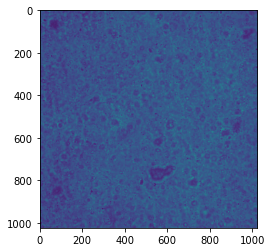

In [15]:
import matplotlib.pyplot as plt
plt.imshow(array)

In [36]:
import xarray as xr
data = xr.DataArray(frames[1])

In [37]:
data.shape

(1024, 1024)

In [16]:
import xarray
import numpy as np
from readlif.reader import LifFile
def read_lif(filename: str, experiment_num: int = 0):
    f = LifFile(filename)

    # Check number of experiments
    if f.num_images > 1:
        print("Multiple experiments detected")
        img = f.get_image(experiment_num)        
    else:
        img = f.get_iter_image(0)
    
    # Extract metadata
    xscale = lifSeq.metadata.PixelsPhysicalSizeX(0)
    tscale = lifSeq.metadata.PlaneDeltaT(0,1)*1000.

    # Convert to delayed xarray
    data = xr.DataArray(img)

    return data
    
